In [41]:
import os
import tarfile
from typing import List, Dict, Union, Tuple
from six.moves import urllib

In [42]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [43]:
#prepare folders
if not os.path.exists(HOUSING_PATH):
    os.mkdir(HOUSING_PATH)

In [44]:
def fetch_housing_data(url: str = HOUSING_URL, download_path: str = HOUSING_PATH)-> None:
    if not os.path.isdir(download_path):
        os.makedirs(download_path)
    tgz_path = os.path.join(download_path, "housing.tgz") 
    if os.path.exists(tgz_path):
        return
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=download_path)
    housing_tgz.close()

In [45]:
fetch_housing_data()

In [46]:
import pandas as pd

def load_csv_data(folder_path: str = HOUSING_PATH) -> pd.DataFrame:
    csv_path = os.path.join(folder_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [47]:
data = load_csv_data(folder_path=HOUSING_PATH)

In [48]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [51]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

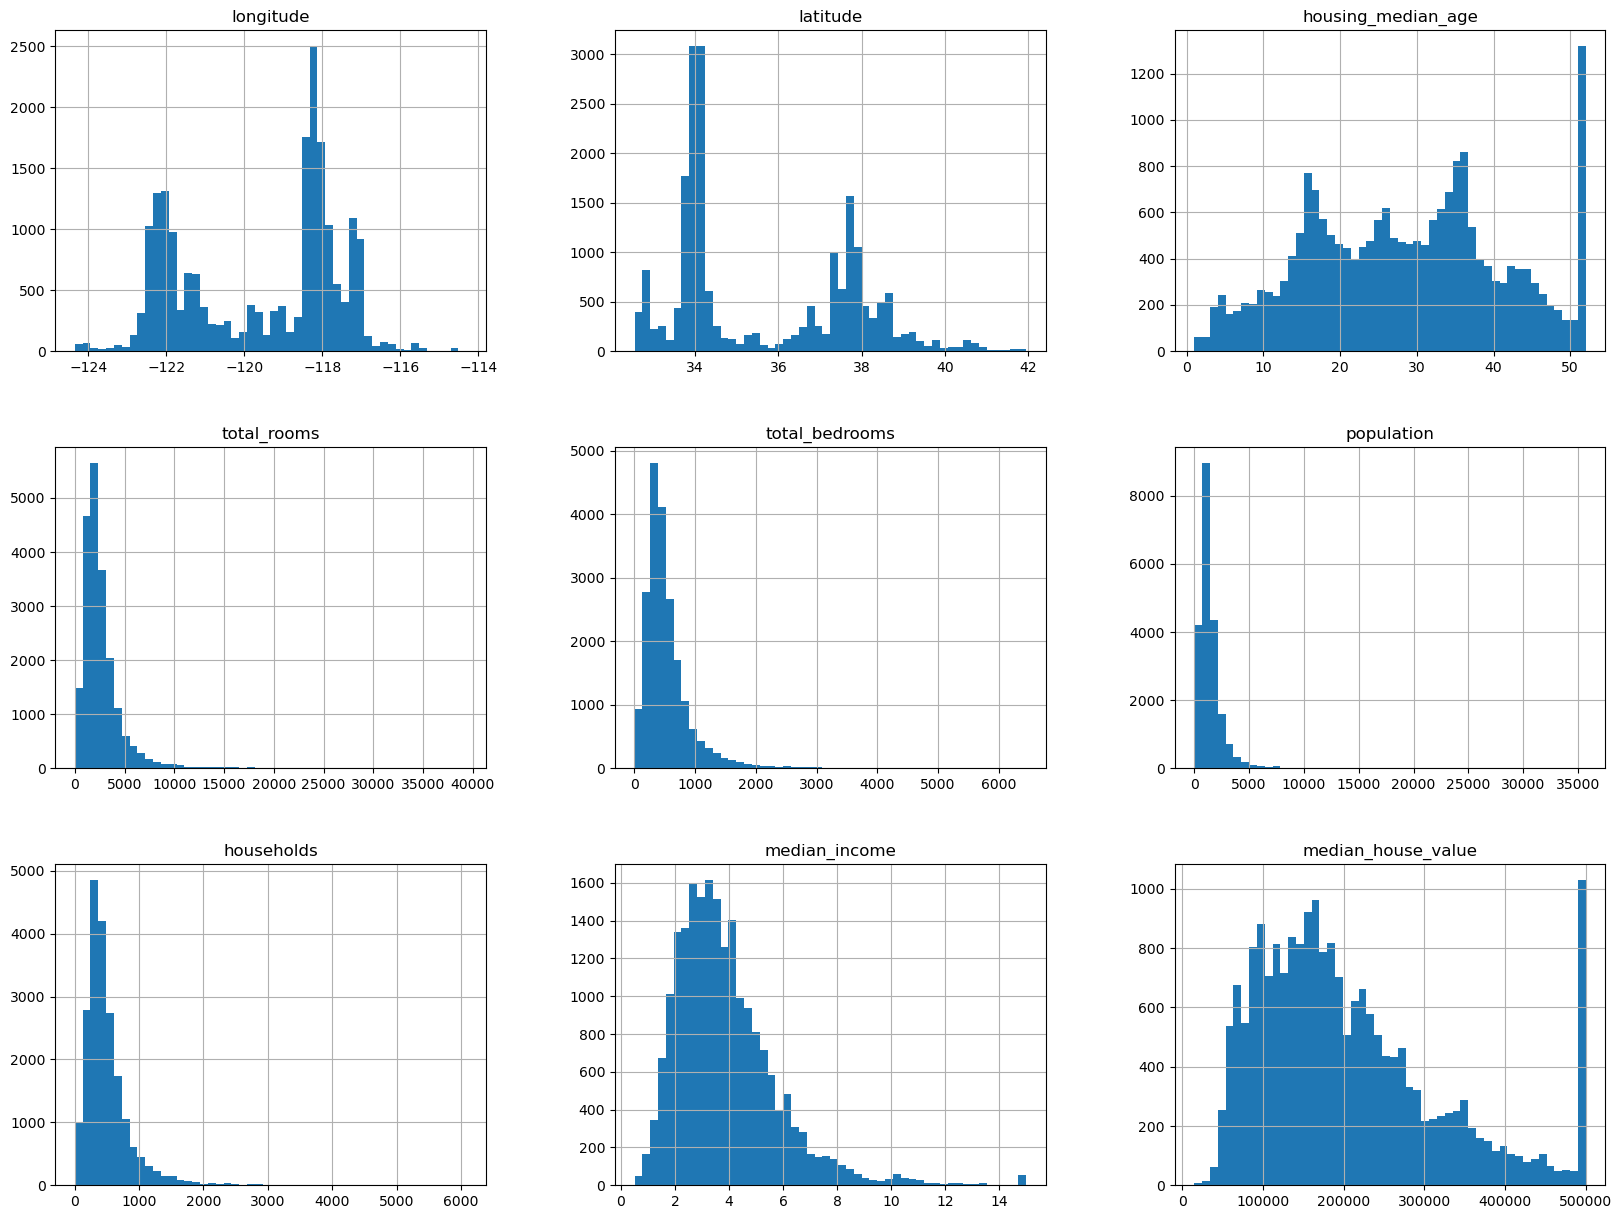

In [53]:
data.hist(bins=50, figsize=(20,15))

In [54]:
import numpy as np

def split_train_test(data: pd.DataFrame , ratio: float = 0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_data_indices = shuffled_indices[:test_set_size]
    train_data_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_data_indices], data.iloc[test_data_indices]


In [55]:
train_set, test_set = split_train_test(data)

In [56]:
len(train_set), len(test_set)

(16512, 4128)

In [57]:
from zlib import crc32

def test_set_check(identifier: int, ratio: float) -> bool:
    return crc32(np.int64(identifier)) & 0xffffffff < ratio * 2 **32

In [58]:
def split_train_test_by_id(data: pd.DataFrame, test_ratio: float, id_column: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~ in_test_set] , data.loc[in_test_set]

In [59]:
data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, 'index')

In [60]:
len(train_set),len(test_set)

(16512, 4128)

In [61]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [62]:
data_with_id['id'] = data_with_id['longitude']* 1000 + data_with_id['latitude']

In [63]:
train_set, test_set = split_train_test_by_id(data_with_id,0.2, 'id')

In [64]:
len(train_set), len(test_set)

(16322, 4318)

In [65]:
data_with_id['income_cat'] = pd.cut(data_with_id['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3,4,5])

<Axes: >

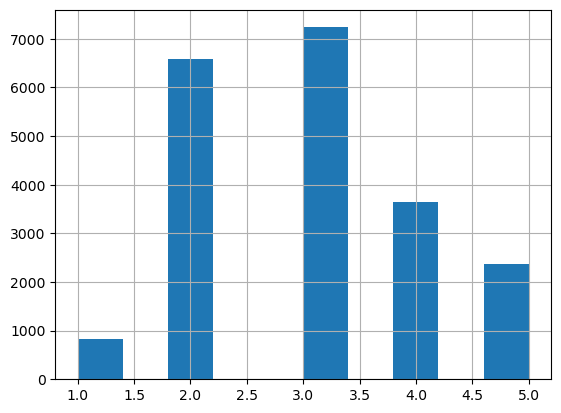

In [66]:
data_with_id['income_cat'].hist()

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

In [68]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42 )

In [69]:
for train_index, test_index in splitter.split(data_with_id, data_with_id['income_cat']):
    strat_train_set = data_with_id.loc[train_index]
    strat_test_set = data_with_id.loc[test_index]

In [70]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)* 100 

income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64

### income percentage by categories on the whole dataset

In [71]:
data_with_id['income_cat'].value_counts()/ len(data_with_id) * 100

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: count, dtype: float64

In [72]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [73]:
strat_train_set.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [74]:
train_exp = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

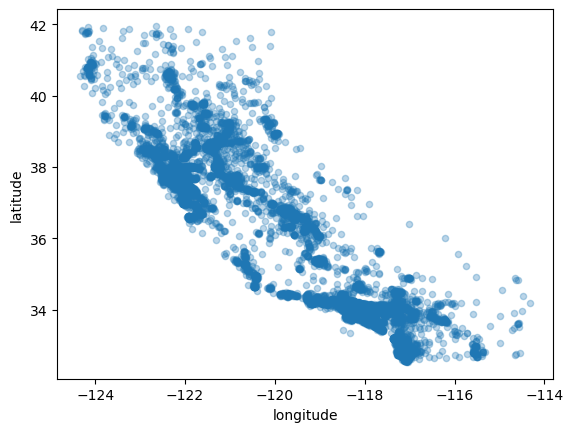

In [75]:
train_exp.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3)

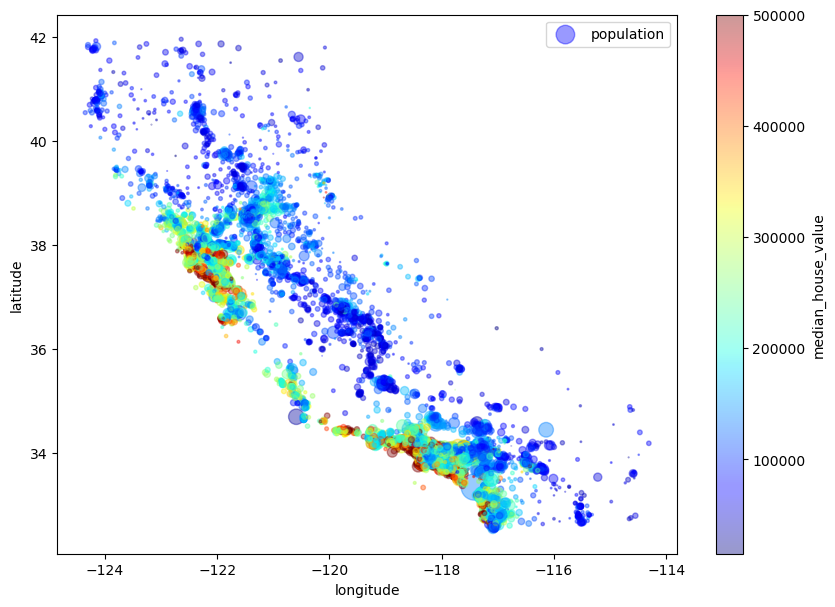

In [76]:
train_exp.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
      s=train_exp['population']/100, label='population', figsize=(10,7),
      c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,
      )
plt.legend()


In [77]:
train_exp['median_house_value'].head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [78]:
corr_matrix = train_exp.corr(numeric_only=True)

In [79]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
index                 0.067805
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
id                   -0.047665
latitude             -0.142673
Name: median_house_value, dtype: float64

In [80]:
corr_matrix.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'id'],
      dtype='object')

In [81]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

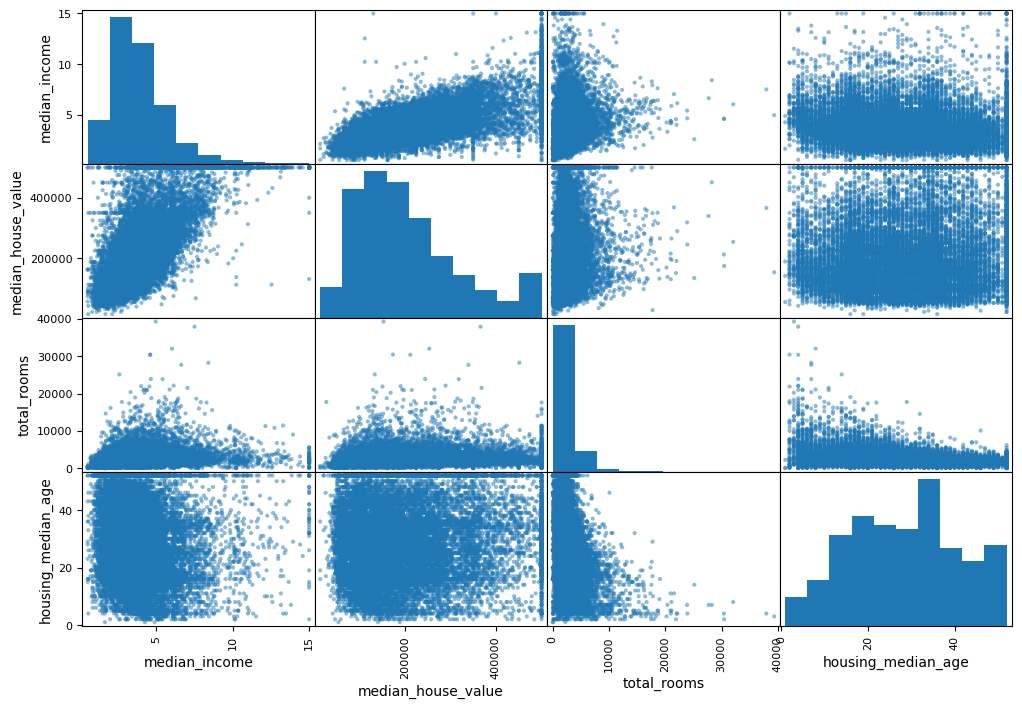

In [82]:
attributes =['median_income','median_house_value','total_rooms','housing_median_age']
scatter_matrix(train_exp[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

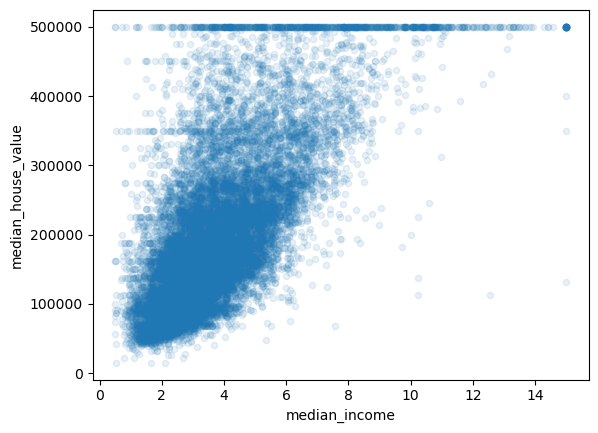

In [83]:
train_exp.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.1)

In [84]:
train_exp['rooms_per_household'] = train_exp['total_rooms'] / train_exp['households']
train_exp['bedrooms_per_room'] = train_exp['total_bedrooms'] / train_exp['total_rooms']
train_exp['population_per_household'] = train_exp['population'] / train_exp['households']

In [88]:
corr_matrix = train_exp.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
index                       0.067805
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
id                         -0.047665
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [89]:
housing = strat_train_set.drop(['median_house_value','index','id'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [90]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [91]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [92]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [93]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [94]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [95]:
housing_cat = housing[['ocean_proximity']]
np.unique(housing_cat)

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [96]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
np.unique(housing_cat_encoded)

In [98]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot[:5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 5)>

### Custom transformer using BaseEstimator and TransformerMixin

In [99]:
from sklearn.base import BaseEstimator , TransformerMixin

In [100]:
room_ix, bedrooms_ix, population_ix, households_idx = 3, 4, 5, 6

In [101]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,room_ix] / X[:, households_idx]
        population_per_household = X[:, population_ix] / X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [102]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [103]:
housing_extra_attribs[:4]


array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 3.168555240793201,
        0.20578363026077975],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 2.6236979166666665,
        0.16071428571428573],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 2.223333333333333,
        0.1915945611866502],
       [-117.13, 32.75, 24.0, 1877.0, 519.0, 898.0, 483.0, 2.2264,
        'NEAR OCEAN', 3.886128364389234, 1.8592132505175984,
        0.2765050612679808]], dtype=object)

### Feature scaling with pipeline

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('attrib_adder',CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num.columns)
housing_num_tr[:3]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252]])

### columns transformation using Column transformer

In [105]:
from sklearn.compose import ColumnTransformer
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [106]:
num_attribs = list(housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [107]:
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
        ('num', num_pipeline,num_attribs),
        ('cat', one_hot_encoder, cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [108]:
housing_prepared[:2]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

### Training and evaluation on training Set

In [109]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [110]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions', lin_reg.predict(some_data_prepared))
print('labels', list(some_labels))

predictions [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [111]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

### Decision Tree regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [113]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

### Cross validation with 10-Fold

In [114]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                       scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores


array([72977.4757369 , 69764.08294594, 70235.82745947, 70898.76252262,
       70843.04850285, 76827.42343207, 71363.41280562, 72537.91372265,
       68049.20729861, 70026.35634501])

In [115]:
def display_scores(scores):
    print('scores', scores)
    print('mean_score', scores.mean())
    print('std', scores.std())
    

In [ ]:
display_scores(tree_rmse_scores)

### cross validation using LinearRegression

In [116]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean_score 69104.07998247063
std 2880.3282098180694


### RandomForest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


np.float64(18689.245321965933)

In [118]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores [51130.65700418 48876.72975674 47008.13376503 52204.23494043
 47463.92365365 51900.58023318 52382.44029041 49810.44325721
 48518.04759739 53751.08610304]
mean_score 50304.627660126294
std 2178.181081941784


### Cross validation using SVMRegressor

In [119]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(housing_prepared, housing_labels)

SVR()

In [120]:
svr_predictions = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

np.float64(118578.69234925653)

In [121]:
svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

scores [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
mean_score 118584.55594251942
std 2609.6120823493407


### dumping models

In [122]:
import os
model_dir = './models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [123]:
import sklearn.externals
import joblib

joblib.dump(lin_reg, model_dir + '/lin_reg.pkl')
joblib.dump(forest_reg, model_dir + '/forest_reg.pkl')
joblib.dump(svr_reg, model_dir + '/svr_reg.pkl')

['./models/svr_reg.pkl']

## Finetuning The model using GridSearch

### GridSearch Cross Validation for RandomForestRegressor

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10] , 'max_features':[2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [127]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [128]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

### Evaluation scores 

In [129]:
cv_results = grid_search.cv_results_
for mean_score,params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

64449.4158294668 {'max_features': 2, 'n_estimators': 3}
55873.83579927776 {'max_features': 2, 'n_estimators': 10}
52697.21461562403 {'max_features': 2, 'n_estimators': 30}
60262.322295442595 {'max_features': 4, 'n_estimators': 3}
52660.28126664073 {'max_features': 4, 'n_estimators': 10}
50386.514710955205 {'max_features': 4, 'n_estimators': 30}
59145.98231280275 {'max_features': 6, 'n_estimators': 3}
52028.31735847686 {'max_features': 6, 'n_estimators': 10}
49799.21122954968 {'max_features': 6, 'n_estimators': 30}
59057.198187970724 {'max_features': 8, 'n_estimators': 3}
52127.391671722864 {'max_features': 8, 'n_estimators': 10}
49953.030125225036 {'max_features': 8, 'n_estimators': 30}
63831.847574444 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54484.91209882352 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59153.332942941335 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52395.58120052052 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Ensemble methods

In [130]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([7.45286260e-02, 6.81477675e-02, 4.28952651e-02, 1.79455534e-02,
       1.73099914e-02, 1.85882119e-02, 1.62302421e-02, 3.34283305e-01,
       4.54127046e-02, 1.11248494e-01, 9.72922514e-02, 1.26639427e-02,
       1.33901589e-01, 8.70557920e-05, 3.91086323e-03, 5.55413679e-03])

In [131]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_hhold']
cat_encoder = full_pipeline.named_transformers_['cat']

In [132]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs




['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [133]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_hhold',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [134]:
from operator import itemgetter
sorted(zip([i for i in range(1,len(attributes))],features_importances, attributes), key=itemgetter(1), reverse=True)

[(8, np.float64(0.33428330463566075), 'median_income'),
 (13, np.float64(0.13390158940874006), 'INLAND'),
 (10, np.float64(0.11124849412301467), 'pop_per_hhold'),
 (11, np.float64(0.0972922513572406), 'bedrooms_per_hhold'),
 (1, np.float64(0.07452862604728104), 'longitude'),
 (2, np.float64(0.06814776747501841), 'latitude'),
 (9, np.float64(0.04541270455941302), 'rooms_per_hhold'),
 (3, np.float64(0.042895265115996395), 'housing_median_age'),
 (6, np.float64(0.018588211923297675), 'population'),
 (4, np.float64(0.017945553380130652), 'total_rooms'),
 (5, np.float64(0.017309991435975378), 'total_bedrooms'),
 (7, np.float64(0.016230242057806606), 'households'),
 (12, np.float64(0.012663942674945828), '<1H OCEAN'),
 (15, np.float64(0.003910863227441716), 'NEAR BAY'),
 (14, np.float64(8.70557920456163e-05), 'ISLAND')]

### Evuating model on test set

In [135]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [136]:
X_test_prepared = full_pipeline.transform(X_test)

In [137]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(48332.30631585013)

In [138]:
from scipy import stats


In [139]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46289.03745643, 50292.63046387])